In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap

In [3]:
auto_df = pd.read_csv('./automobile_data/co2.csv')

In [4]:
auto_df.value_counts()

Make      Model        Vehicle Class          Engine Size(L)  Cylinders  Transmission  Fuel Type  Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)
LEXUS     GS F         COMPACT                5.0             8          AS8           Z          14.9                              9.7                              12.5                              23                           293                    5
CHRYSLER  300          FULL-SIZE              3.6             6          A8            X          12.4                              7.8                              10.3                              27                           242                    4
FIAT      500L         STATION WAGON - SMALL  1.4             4          A6            X          10.7                              7.9                              9.4                               30                           221               

In [5]:
auto_df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
auto_df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [7]:
test_df = auto_df.copy()

In [26]:
auto_df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [42]:
auto_df

,Make,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,...,Model_Z4 M40i,Model_Z4 sDRIVE28i,Model_Z4 sDRIVE35i,Model_Z4 sDRIVE35is,Model_Z4 sDrive30i,Model_iM,Model_iQ,Model_tC,Model_xB,Model_xD
0,ACURA,2.0,4,9.9,6.7,8.5,33,196,False,False,...,False,False,False,False,False,False,False,False,False,False
1,ACURA,2.4,4,11.2,7.7,9.6,29,221,False,False,...,False,False,False,False,False,False,False,False,False,False
2,ACURA,1.5,4,6.0,5.8,5.9,48,136,False,False,...,False,False,False,False,False,False,False,False,False,False
3,ACURA,3.5,6,12.7,9.1,11.1,25,255,False,False,...,False,False,False,False,False,False,False,False,False,False
4,ACURA,3.5,6,12.1,8.7,10.6,27,244,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,2.0,4,10.7,7.7,9.4,30,219,False,False,...,False,False,False,False,False,False,False,False,False,False
7381,VOLVO,2.0,4,11.2,8.3,9.9,29,232,False,False,...,False,False,False,False,False,False,False,False,False,False
7382,VOLVO,2.0,4,11.7,8.6,10.3,27,240,False,False,...,False,False,False,False,False,False,False,False,False,False
7383,VOLVO,2.0,4,11.2,8.3,9.9,29,232,False,False,...,False,False,False,False,False,False,False,False,False,False


Check the correlation between Engine size and CO2 emissions 

In [11]:
print(auto_df['Engine Size(L)'].corr(auto_df['CO2 Emissions(g/km)']))
print(auto_df['Fuel Consumption Comb (L/100 km)'].corr(auto_df['CO2 Emissions(g/km)']))

0.8511446437900011
0.9180515723870846


In [12]:
print(auto_df['Cylinders'].corr(auto_df['CO2 Emissions(g/km)']))

0.8326436002237773


Simple Linear RegressionUsing Engine size to predict CO2 emissions

In [13]:
X = auto_df['Engine Size(L)'].to_numpy().reshape(-1,1)
y = auto_df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean error: 30.2 (12.0%)


In [35]:
X = auto_df[['Cylinders', 
             'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 
             'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',  
             'Engine Size(L)']]
y = auto_df['CO2 Emissions(g/km)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 337.6683854093421


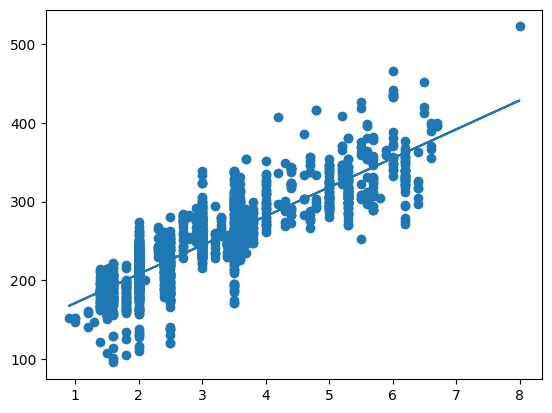

In [15]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [23]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Consumption City (L/100 km)  7385 non-null   float64
 7   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 8   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 9   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 10  CO2 Emissions(g/km)               7385 non-null   int64  
 11  Fuel Type_E                       7385 non-null   bool   
 12  Fuel T

In [24]:
test_df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,ACURA,ILX,COMPACT,2.0,4,AS5,9.9,6.7,8.5,33,196,False,False,False,True
1,ACURA,ILX,COMPACT,2.4,4,M6,11.2,7.7,9.6,29,221,False,False,False,True
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,6.0,5.8,5.9,48,136,False,False,False,True
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,12.7,9.1,11.1,25,255,False,False,False,True
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,12.1,8.7,10.6,27,244,False,False,False,True
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,11.9,7.7,10.0,28,230,False,False,False,True
6,ACURA,TL,MID-SIZE,3.5,6,AS6,11.8,8.1,10.1,28,232,False,False,False,True
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,12.8,9.0,11.1,25,255,False,False,False,True
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,13.4,9.5,11.6,24,267,False,False,False,True
9,ACURA,TSX,COMPACT,2.4,4,AS5,10.6,7.5,9.2,31,212,False,False,False,True


In [37]:
X = test_df.drop(columns=['CO2 Emissions(g/km)'])
y = test_df['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'BMW'

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Trying multi-regression for fuel consumption and cylinders and emissions

In [20]:
X = auto_df[['Engine Size(L)', 'Cylinders']].to_numpy()
y = auto_df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 29.6 (11.8%)


Mean error: 29.8 (11.9%)
Model determination:  0.7280078511500028


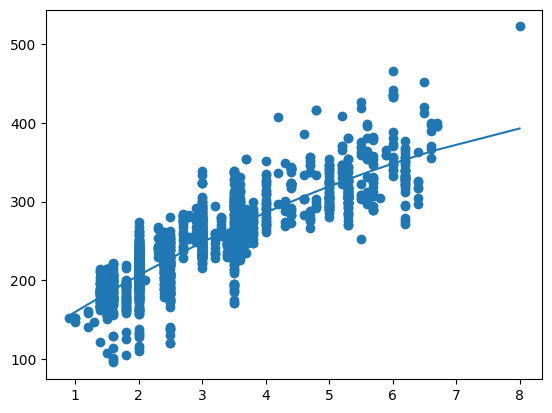

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))